Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [1]:
import numpy as np
from taxi_env_extended import TaxiEnvExtended
import pickle
import os

In [2]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [3]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [4]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [5]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [6]:
def epsilon_greedy_policy(state, Q, epsilon):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
        #print('explore')
    # exploit
    else:
        action = np.argmax(Q[state])
        #print('exploit')
        
    return action

In [7]:
def save_progress(Q, total_rewards, episode):
    # Crear la carpeta 'progress' si no existe
    progress_dir = 'progress'
    os.makedirs(progress_dir, exist_ok=True)
    
    # Guardar el archivo de progreso en la carpeta 'progress'
    with open(os.path.join(progress_dir, f'progress_{episode}.pkl'), 'wb') as f:
        pickle.dump((Q, total_rewards), f)

In [8]:
def load_progress(filename):
    # Especificar la carpeta de progreso
    progress_dir = 'progress'
    filepath = os.path.join(progress_dir, filename)
    
    with open(filepath, 'rb') as f:
        return pickle.load(f)

In [9]:
def linear_decay(episode, hyperparameter_start, hyperparameter_end, num_episodes):
    hyperparameter = max(hyperparameter_end, hyperparameter_start - (episode / num_episodes) * (hyperparameter_start - hyperparameter_end))
    return hyperparameter

In [10]:
import matplotlib.pyplot as plt

def plot_rewards(total_rewards):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(total_rewards)), total_rewards, marker='o', linestyle='-', color='b')
    plt.xlabel('Episodios')
    plt.ylabel('Recompensas')
    plt.title('Recompensas Totales en Función de los Episodios')
    plt.grid(True)
    plt.show()

In [11]:
def train(Q, gamma, alpha, epsilon):
    state = env.reset()[0]
    done = False
    
    while not done:
        action = epsilon_greedy_policy(state, Q, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        old_value = Q[state, action]
        next_max = np.max(Q[next_state])

        # Actualizar el valor Q
        Q[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

In [12]:
def test(Q, total_rewards, total_steps):
    obs, _ = env.reset()
    #print(obs)
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        state = obs
        action = optimal_policy(state, Q)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        step_count += 1
        #print('->', state, action, reward, obs, done)
        #print(env.render())

    total_rewards.append(total_reward)
    total_steps.append(step_count)

In [13]:
# Hiperparámetros
gamma = 0.8  # Factor de descuento
# Tasa de aprendizaje
alpha_start = 0.1
alpha_end = 0.01

# Probabilidad de exploración
epsilon_start = 0.9
epsilon_end = 0.1
num_episodes = 300000  # Número de episodios de entrenamiento

In [14]:
# Episodios de entrenamiento y prueba
import gc
total_rewards  = [];
total_steps = [];
save_interval = 10000  # Guardar el progreso cada 10000 episodios
start_episode = 0
try:
    Q, total_rewards = load_progress('progress_.pkl')
    start_episode = len(total_rewards)
except FileNotFoundError:
    pass

for episode in range(start_episode, num_episodes):
    epsilon = linear_decay(episode, epsilon_start, epsilon_end, num_episodes)
    alpha = linear_decay(episode, alpha_start, alpha_end, num_episodes)

    train(Q, gamma, alpha, epsilon)

    test(Q, total_rewards, total_steps)
    
     # Guardar progreso periódicamente
    if episode % save_interval == 0:
        save_progress(Q, total_rewards, episode)
        
# Resultados
save_progress(Q, total_rewards, num_episodes)  # Guardar el progreso final
gc.collect()

#print("Entrenamiento completado!")

0

Recompensas acumuladas luego de 100.000 episodios

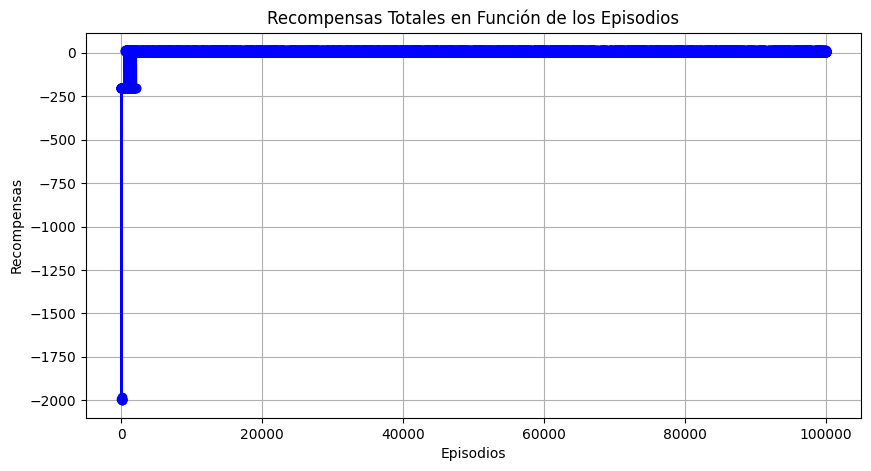

In [15]:
try:
    Q100k, total_rewards_100k = load_progress('progress_100000.pkl')
except FileNotFoundError:
    print("No se ha encontrado el archivo 'progress_100000.pkl'")

plot_rewards(total_rewards_100k) 

Recomensas acumuladas luego de 200.000 episodios

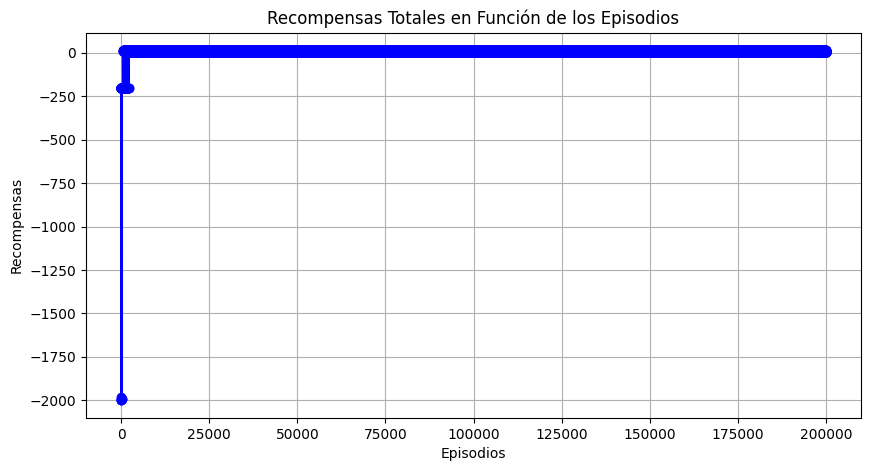

In [16]:
try:
    Q200k, total_rewards_200k = load_progress('progress_200000.pkl')
except FileNotFoundError:
    print("No se ha encontrado el archivo 'progress_200000.pkl'")

plot_rewards(total_rewards_200k) 

Recomensas acumuladas luego de 300.000 episodios

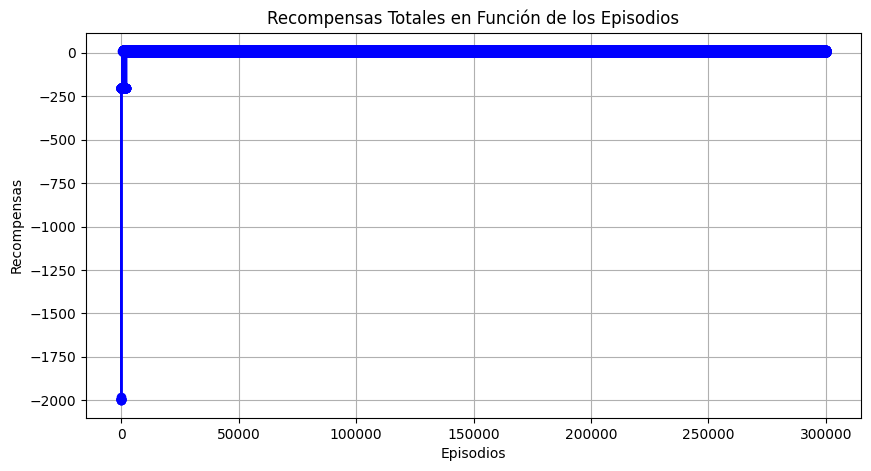

In [17]:
try:
    Q300k, total_rewards_300k = load_progress('progress_300000.pkl')
except FileNotFoundError:
    print("No se ha encontrado el archivo 'progress_300000.pkl'")

plot_rewards(total_rewards_300k) 

Recompensas obtenidas

In [18]:
print("Recompensas:", total_rewards_300k)
print("Pasos:", total_steps)
print("Recompensas promedio:", np.mean(total_rewards_300k))
print("minima recompensa:", np.min(total_rewards_300k))
print("maxima recompensa:", np.max(total_rewards_300k))

Recompensas: [-200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -1991, -200, -200, -200, -200, -200, -200, -200, -200, -1982, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -2000, -200, -200, -200, -200, -200, -2000, -200, -2000, -1991, -200, -200, -200, -200, -200, -1991, -200, -200, -1991, -200, -200, -200, -200, -200, -200, -200, -1991, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200, -200,

Recompensas: [9, 8, 8, 8, 3, 8, 10, 8, 7, 13, 11, 6, 9, 5, 9, 3, 7, 13, 6, 9, 7, 5, 9, 7, 10, 7, 13, 8, 12, 10, 12, 4, 11, 5, 6, 6, 9, 9, 9, 6, 8, 5, 5, 9, 3, 9, 8, 4, 3, 9, 10, 8, 6, 5, 7, 8, 7, 6, 10, 7, 7, 13, 11, 8, 4, 5, 12, 3, 3, 8, 8, 7, 10, 8, 9, 10, 5, 11, 8, 7, 4, 9, 7, 10, 8, 12, 8, 8, 6, 7, 11, 8, 4, 5, 7, 9, 7, 8, 13, 8, 11, 4, 10, 7, 9, 11, 5, 7, 7, 11, 6, 4, 9, 9, 5, 9, 5, 6, 3, 5, 6, 7, 8, 5, 8, 3, 13, 5, 4, 10, 4, 7, 7, 3, 5, 10, 9, 8, 5, 10, 9, 12, 8, 6, 8, 6, 6, 6, 9, 6, 8, 9, 10, 13, 4, 7, 9, 4, 7, 9, 5, 13, 10, 8, 7, 7, 6, 6, 14, 8, 6, 6, 10, 12, 7, 4, 8, 10, 6, 9, 9, 6, 9, 7, 15, 6, 3, 9, 11, 10, 11, 9, 9, 9, 11, 6, 5, 10, 11, 9, 10, 3, 8, 3, 7, 9, 11, 7, 3, 13, 6, 6, 8, 9, 7, 10, 4, 10, 11, 10, 8, 6, 10, 8, 8, 9, 9, 12, 5, 10, 5, 9, 8, 9, 13, 3, 8, 6, 8, 11, 9, 6, 6, 7, 5, 10, 8, 9, 10, 7, 4, 8, 7, 4, 5, 15, 9, 8, 5, 4, 7, 6, 7, 11, 8, 9, 11, 4, 5, 7, 13, 4, 4, 7, 9, 8, 8, 3, 8, 10, 9, 10, 5, 10, 4, 8, 9, 14, 10, 8, 8, 8, 10, 8, 12, 5, 6, 11, 8, 6, 8, 12, 6, 8, 8

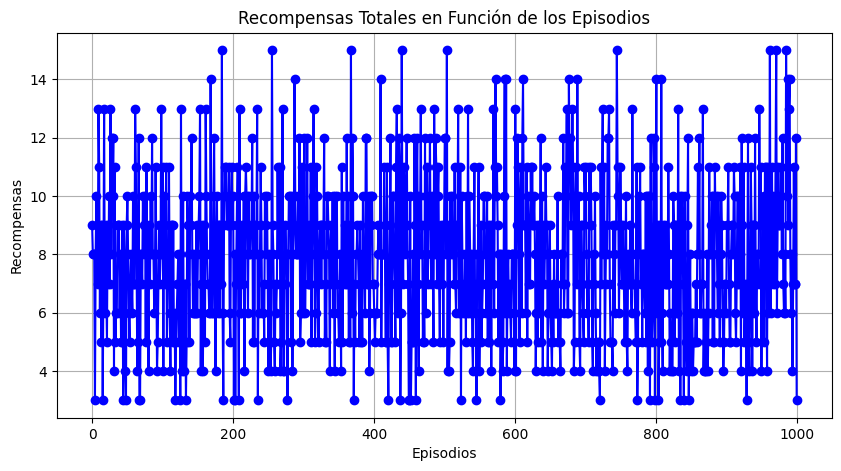

In [19]:
last_1000_rewards = total_rewards_300k[-1000:]
print("Recompensas:", last_1000_rewards)
print("Recompensas promedio:", np.mean(last_1000_rewards))
print("Mínima recompensa:", np.min(last_1000_rewards))
print("Máxima recompensa:", np.max(last_1000_rewards))
plot_rewards(last_1000_rewards) 